In [27]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Membaca Dataset dari Drive
df = pd.read_excel('/content/drive/MyDrive/09. TUGAS, UTS , UAS/Semester 6/05. 412563403 - Analitik dan Visualisasi data/Tugas Besar/Dataset.xlsx')

# Normalisasi nama kolom → huruf kecil, tanpa spasi, ganti titik
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '', regex=False)

# Cek hasil nama kolom
print("Nama kolom setelah normalisasi:")
print(df.columns.tolist())


Nama kolom setelah normalisasi:
['who_region', 'country_name', 'city', 'year', 'pm10_concentration', 'pm25_concentration', 'no2_concentration', 'population', 'latitude', 'longitude']


In [24]:
df_clean = df.drop_duplicates()
df_clean = df_clean.dropna(how='all')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

display(df_clean)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Menghapus baris yang tidak memiliki data PM2.5 maupun PM10
df_clean = df.dropna(subset=['pm25_concentration', 'pm10_concentration'], how='all')

print("📌 Jumlah data setelah menghapus baris tanpa PM2.5 dan PM10:", df_clean.shape)
print("\n📌 Contoh data setelah cleaning:")
print(df_clean.head())


📌 Jumlah data setelah menghapus baris tanpa PM2.5 dan PM10: (36225, 10)

📌 Contoh data setelah cleaning:
  who_region country_name          city  year  pm10_concentration  \
0      4_Eur        Spain  A Coruna/ESP  2013              23.238   
1      4_Eur        Spain  A Coruna/ESP  2014              27.476   
2      4_Eur        Spain  A Coruna/ESP  2015              25.515   
3      4_Eur        Spain  A Coruna/ESP  2016              23.057   
4      4_Eur        Spain  A Coruna/ESP  2017              26.849   

   pm25_concentration  no2_concentration  population   latitude  longitude  
0              11.491             28.841    246146.0  43.367900  -8.418571  
1              15.878             19.575    247604.0  43.368033  -8.418233  
2              14.004             22.731    247604.0  43.370375  -8.422900  
3              13.160             20.204    247604.0  43.370375  -8.422900  
4              14.114             21.543    247604.0  43.370375  -8.422900  


In [ ]:
kolom_negara = 'country_name'
kolom_tahun  = 'year'
kolom_pm25   = 'pm25_concentration'

# Filter data tahun 2010 dan 2022
df_2010 = df[df[kolom_tahun] == 2010]
df_2022 = df[df[kolom_tahun] == 2022]

# Hitung rata-rata PM2.5 per negara
avg_2010 = df_2010.groupby(kolom_negara)[kolom_pm25].mean()
avg_2022 = df_2022.groupby(kolom_negara)[kolom_pm25].mean()

# Ambil Top 10 negara (berdasarkan 2022)
top10_negara = avg_2022.nlargest(10).index

# Gabungkan ke tabel perbandingan
tabel_pm25 = pd.DataFrame({
    'Average_PM2.5_2010 (µg/m³)': avg_2010[top10_negara],
    'Average_PM2.5_2022 (µg/m³)': avg_2022[top10_negara]
}).reset_index()

tabel_pm25 = tabel_pm25.round(2)
tabel_pm25 = tabel_pm25.rename(columns={kolom_negara: 'Country'})

print(tabel_pm25)

        Country  Average_PM2.5_2010 (µg/m³)  Average_PM2.5_2022 (µg/m³)
0  Saudi Arabia                         NaN                       38.82
1      Bulgaria                       23.85                       25.14
2       Romania                       15.82                       17.80
3        Greece                       14.86                       16.69
4        Latvia                       21.49                       11.73
5     Lithuania                       15.85                        6.25
6       Estonia                        7.72                        5.14
7        Norway                       10.55                        2.22
8         Italy                       20.09                         NaN
9        Sweden                        7.45                         NaN


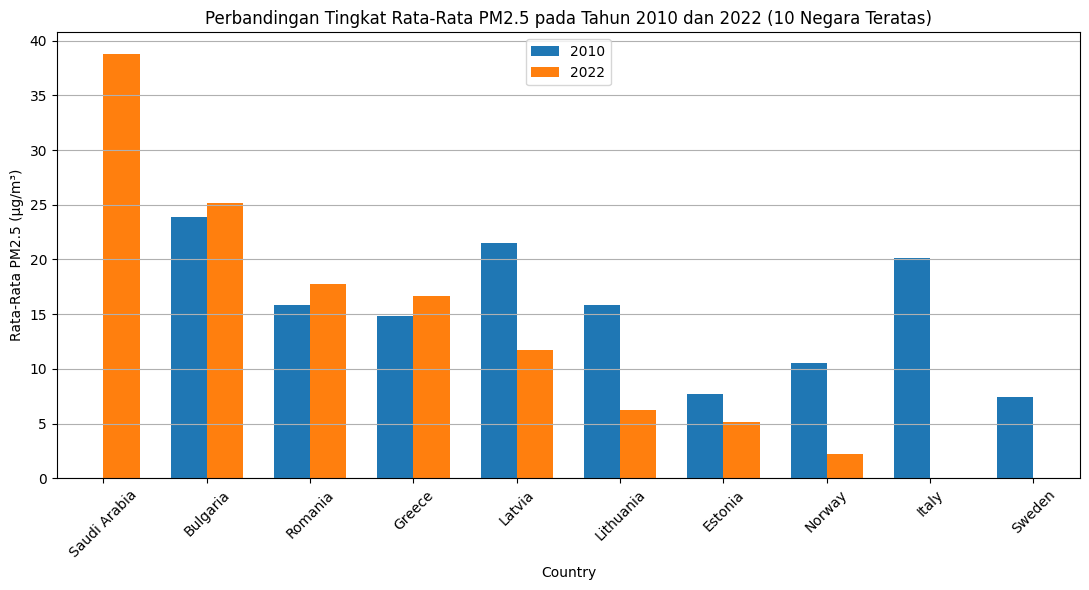

In [ ]:
kolom_negara = 'country_name'
kolom_tahun  = 'year'
kolom_pm25   = 'pm25_concentration'

# Filter data tahun 2010 dan 2022
df_2010 = df[df[kolom_tahun] == 2010]
df_2022 = df[df[kolom_tahun] == 2022]

# Hitung rata-rata PM2.5 per negara
avg_2010 = df_2010.groupby(kolom_negara)[kolom_pm25].mean()
avg_2022 = df_2022.groupby(kolom_negara)[kolom_pm25].mean()

# Ambil Top 10 negara (berdasarkan 2022)
top10_negara = avg_2022.nlargest(10).index

data_compare = pd.DataFrame({
    '2010': avg_2010[top10_negara],
    '2022': avg_2022[top10_negara]
}).reset_index()

# Visualisasi Bar Chart
x = np.arange(len(data_compare[kolom_negara]))
width = 0.35

plt.figure(figsize=(11,6))
plt.bar(x - width/2, data_compare['2010'], width, label='2010')
plt.bar(x + width/2, data_compare['2022'], width, label='2022')

plt.xticks(x, data_compare[kolom_negara], rotation=45)
plt.xlabel('Country')
plt.ylabel('Rata-Rata PM2.5 (µg/m³)')
plt.title('Perbandingan Tingkat Rata-Rata PM2.5 pada Tahun 2010 dan 2022 (10 Negara Teratas)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Tabel Rata-rata PM2.5 Tahunan (Global)
    year  pm25_concentration
0   2010               16.03
1   2011               15.85
2   2012               15.79
3   2013               17.13
4   2014               19.58
5   2015               22.67
6   2016               21.78
7   2017               20.05
8   2018               22.89
9   2019               20.00
10  2020               14.82
11  2021               11.82
12  2022               17.18


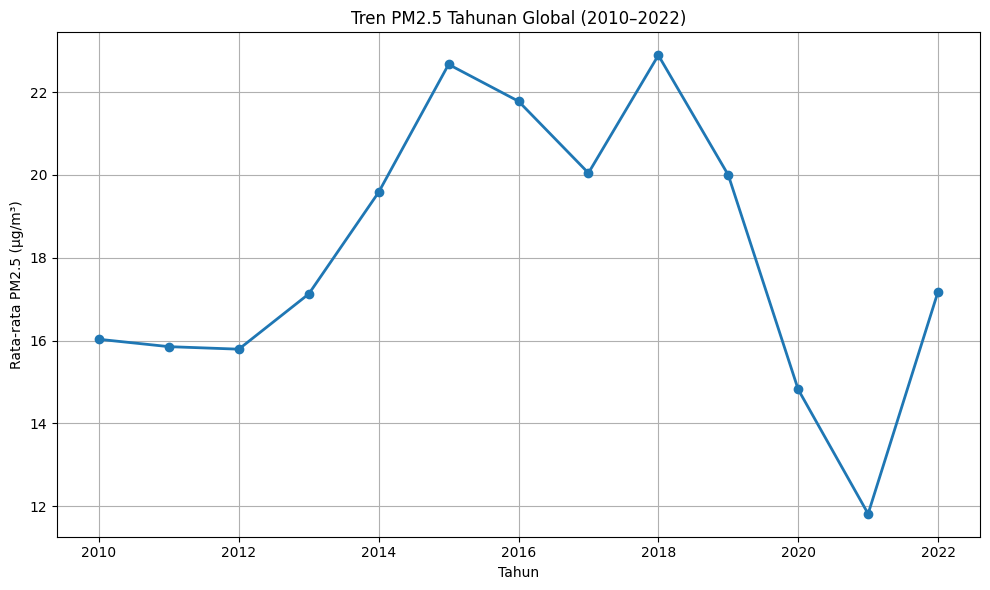

In [ ]:
kolom_tahun = 'year'
kolom_pm25  = 'pm25_concentration'

# Hitung rata-rata PM2.5 per tahun
pm25_trend = (
    df.groupby(kolom_tahun)[kolom_pm25]
    .mean()
    .reset_index()
    .sort_values(kolom_tahun)
)

# TABEL HASIL
tabel_pm25_trend = pm25_trend.round(2)
print("Tabel Rata-rata PM2.5 Tahunan (Global)")
print(tabel_pm25_trend)

# VISUALISASI TREN
plt.figure(figsize=(10,6))
plt.plot(
    pm25_trend[kolom_tahun],
    pm25_trend[kolom_pm25],
    marker='o',
    linewidth=2 )
plt.title('Tren PM2.5 Tahunan Global (2010–2022)')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


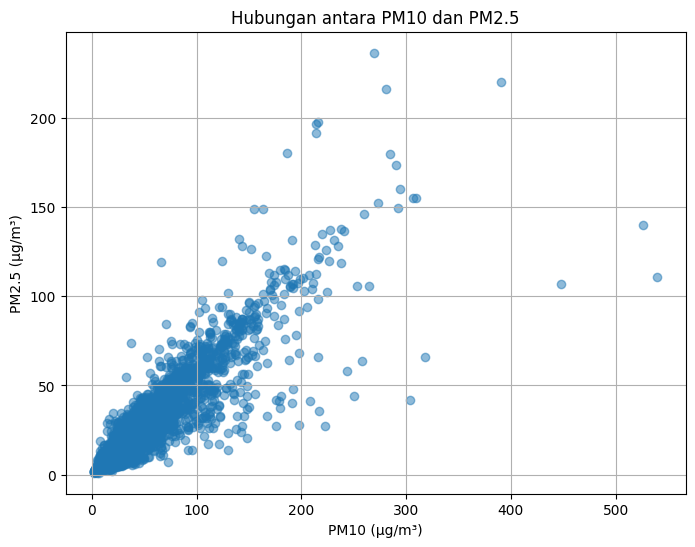

In [ ]:
kolom_pm10 = [c for c in df.columns if 'pm10' in c or 'pm_10' in c][0]

plt.figure(figsize=(8,6))
plt.scatter(df[kolom_pm10], df[kolom_pm25], alpha=0.5)
plt.title('Hubungan antara PM10 dan PM2.5')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()


In [ ]:
# Versi interaktif (Plotly)
fig_bar = px.bar(top10_pm25, x=kolom_negara, y=kolom_pm25,
                 title='Top 10 Negara dengan Rata-rata PM2.5 Tertinggi',
                 color=kolom_pm25, color_continuous_scale='Oranges')
fig_bar.show()

# Plot interaktif
fig_line = px.line(pm25_trend, x=kolom_tahun, y=kolom_pm25,
                   title='Tren PM2.5 Tahunan Global (2010–2024)', markers=True)
fig_line.show()

# Scatter interaktif dengan garis regresi
fig_scatter = px.scatter(df, x=kolom_pm10, y=kolom_pm25,
                         title='Hubungan PM10 vs PM2.5',
                         opacity=0.6,
                         color=kolom_negara,
                         trendline='ols')
fig_scatter.show()

# Cek kolom koordinat pada Dataset
kolom_lat = [c for c in df.columns if 'lat' in c][0] if any('lat' in c for c in df.columns) else None
kolom_lon = [c for c in df.columns if 'lon' in c][0] if any('lon' in c for c in df.columns) else None

if kolom_lat and kolom_lon:
  # Jika ada kolom latitude & longitude
    fig_map = px.scatter_geo(df,
                             lat=kolom_lat, lon=kolom_lon,
                             color=kolom_pm25,
                             hover_name=kolom_negara,
                             title='Sebaran Spasial PM2.5 (µg/m³) per Negara',
                             color_continuous_scale='Reds',
                             projection='natural earth')
    fig_map.show()
else:
   # Jika tidak ada koordinat, pakai nama negara
    pm25_country = df.groupby(kolom_negara)[kolom_pm25].mean().reset_index()
    fig_map = px.choropleth(pm25_country,
                            locations=kolom_negara,
                            locationmode='country name',
                            color=kolom_pm25,
                            title='Sebaran Spasial PM2.5 per Negara',
                            color_continuous_scale='Reds')
    fig_map.show()
